In [61]:
#importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#reading the data from csv 

In [2]:
data = pd.read_csv("../Data/mouse_viral_study.csv")

In [ ]:
#let's grab some information about our data i.e. how many columns are there and the data type of those columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [64]:
#grabing some statistics pf the data i.e. count, mean, std, percentiles

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Med_1_mL,400.0,5.447984,2.319059,1.0,3.249062,5.393776,7.630389,10.0
Med_2_mL,400.0,5.616750,2.336637,1.0,3.431311,5.638471,7.782614,10.0
Virus Present,400.0,0.500000,0.500626,0.0,0.000000,0.500000,1.000000,1.0


In [6]:
data.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


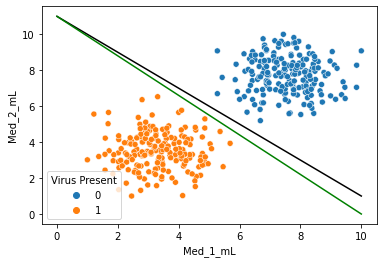

In [10]:
sns.scatterplot(x=data["Med_1_mL"], y=data["Med_2_mL"], hue="Virus Present", data=data)
#lets create a hyperplane
x = np.linspace(0,10,100)
m = -1
b = 11
y = m * x + b
plt.plot(x, y, "black")
m1 = -1.1
y1 = m1 * x + b
plt.plot(x, y1, "green")

In [11]:
from sklearn.svm import SVC

In [13]:
# help(SVC)

In [14]:
y = data['Virus Present']
X = data.drop("Virus Present", axis=1)

In [15]:
model = SVC(kernel="linear", C=1000)

In [16]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [17]:
from svm_margin_plot import plot_svm_boundary

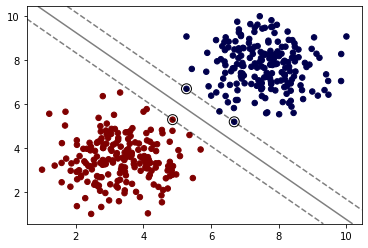

In [19]:
plot_svm_boundary(model, X, y)

In [20]:
model1 = SVC(kernel="linear", C=0.05)

In [21]:
model1.fit(X, y)

SVC(C=0.05, kernel='linear')

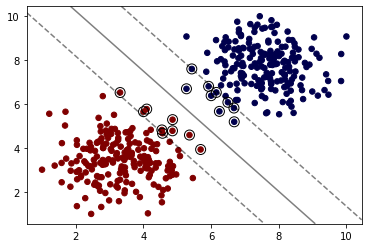

In [22]:
plot_svm_boundary(model1, X, y)

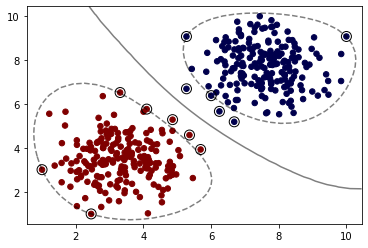

In [23]:
model2 = SVC(kernel="rbf", C=1)
model2.fit(X,y)
plot_svm_boundary(model2, X, y)

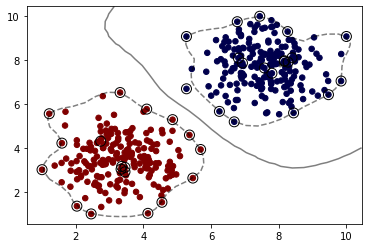

In [25]:
model2 = SVC(kernel="rbf", C=1, gamma="auto")
model2.fit(X,y)
plot_svm_boundary(model2, X, y)

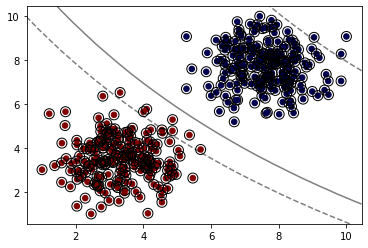

In [26]:
model3 = SVC(kernel="sigmoid")
model3.fit(X,y)
plot_svm_boundary(model3, X, y)

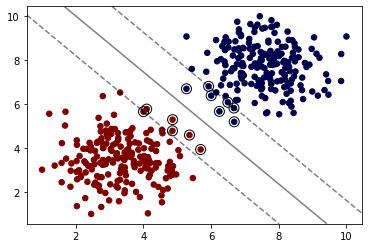

In [28]:
model4 = SVC(kernel='poly', C=1, degree=1)
model4.fit(X, y)
plot_svm_boundary(model4, X, y)

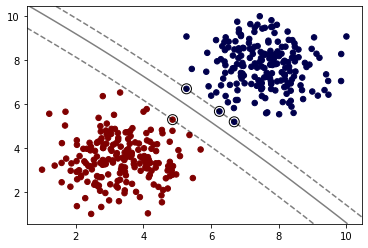

In [32]:
model4 = SVC(kernel='poly', C=.05, degree=6)
model4.fit(X, y)
plot_svm_boundary(model4, X, y)

In [34]:
from sklearn.model_selection import GridSearchCV

In [37]:
svm = SVC()
param_grid = {'C':[0.01, 0.1, 0.5, 1], 'kernel':["linear","poly",'sigmoid']}

In [38]:
grid = GridSearchCV(svm, param_grid)

In [39]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'sigmoid']})

In [40]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [41]:
grid.best_score_

1.0

In [50]:
final_model = SVC(C=0.01, kernel="linear")
final_model.fit(X,y)

SVC(C=0.01, kernel='linear')

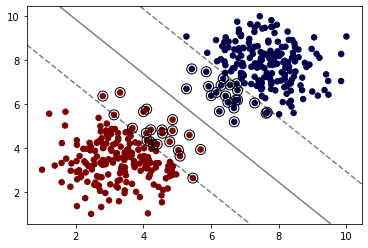

In [51]:
plot_svm_boundary(final_model, X, y)

In [56]:
sample_test = [[np.random.uniform(1,6), np.random.uniform(1,5)]]

In [57]:
sample_test

[[2.1444941086664158, 4.725124168708148]]

In [58]:
final_model.predict(sample_test)

array([1], dtype=int64)

In [59]:
sample_test = [[np.random.uniform(5,10), np.random.uniform(6,10)]]

In [60]:
final_model.predict(sample_test)

array([0], dtype=int64)